In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.metrics import (recall_score,accuracy_score, 
precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from mlxtend.plotting import plot_learning_curves
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison


# **************************
# ******* Change log *******
# Date: 08.02.2023
# implementation of TF-IDF
# **************************
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('/content/sample_data/Reviews_1.csv')
# half_dataset = int((df['Text'].count()*0.30))
# print(half_dataset)
# df = df[:half_dataset]

In [ ]:
import nltk
nltk.download('all')

In [ ]:
import string
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")

def preprocess_text(text):
  text = ''.join(i for i in text if not i.isdigit())
  text = text.lower()
  text = re.sub(r"http\S|www\S+|https\S+","",text,flags=re.MULTILINE)
  text = text.translate(str.maketrans("","",string.punctuation))
  text = ' '.join([word for word in text.split() if word not in cachedStopWords])
  return text



df['Text'] = df.Text.apply(preprocess_text)

In [ ]:
training_sentences,testing_sentences,training_labels,testing_labels = train_test_split(df['Text'].values,df['Score'].values,test_size=.20, random_state=10)     
training_sentences.shape
cv = CountVectorizer()
cv.fit(training_sentences)
CountVectorizer()

CountVectorizer()

In [ ]:
cv.get_feature_names_out()
print(len(cv.get_feature_names_out()))
cv_train = cv.transform(training_sentences)
cv_test = cv.transform(testing_sentences)
print(cv_train.shape)
print(cv_test.shape)

192081
(454763, 192081)
(113691, 192081)


In [ ]:
del training_sentences,testing_sentences,training_labels,testing_labels

In [ ]:
training_sentences,testing_sentences,training_labels,testing_labels = train_test_split(df['Text'].values,df['Score'].values,test_size=.20, random_state=0)     
training_sentences.shape
tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(training_sentences)
tfidf_test = tfidf.transform(testing_sentences)

In [ ]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(454763, 192589)
(113691, 192589)


In [ ]:
nb = MultinomialNB(alpha=1)
nb.fit(cv_train,training_labels)
MultinomialNB(alpha=1)
nb_pred = nb.predict(cv_test)


In [ ]:
lg = LogisticRegression(solver='lbfgs', max_iter=5000)
lg.fit(cv_train,training_labels)
LogisticRegression()
bow_lg_pred = lg.predict(cv_test)


In [ ]:
lg = LogisticRegression(solver='lbfgs', max_iter=5000)
lg.fit(tfidf_train,training_labels)
LogisticRegression()
tf_lg_pred = lg.predict(tfidf_test)

In [ ]:
print("Logistic Regression")
print("Training Score: ",lg.score(tfidf_train,training_labels))
print("Testing Score: ",lg.score(tfidf_test,testing_labels))
print()
print("Confusion Matrix")
print(confusion_matrix(testing_labels,tf_lg_pred))
print(precision_score(testing_labels, tf_lg_pred,average='weighted'))
print(recall_score(testing_labels, tf_lg_pred,average='weighted'))
print(accuracy_score(testing_labels, tf_lg_pred))

Logistic Regression
Training Score:  0.7882721329571667
Testing Score:  0.7574654106305688

Confusion Matrix
[[ 7280   566   380   195  1846]
 [ 1501  1695   913   348  1728]
 [  739   469  2955  1172  3115]
 [  388   153   867  4857  9964]
 [  675   168   492  1895 69330]]
0.7280116751424257
0.7574654106305688
0.7574654106305688


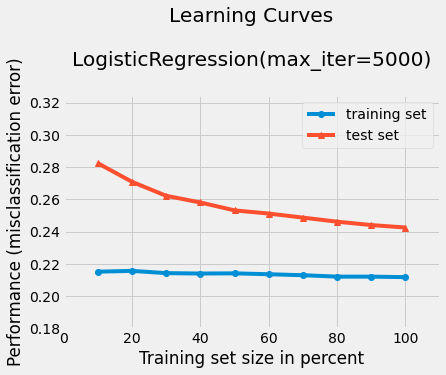

In [ ]:
lg_clf = lg

plot_learning_curves(tfidf_train,training_labels, tfidf_test,testing_labels,lg_clf)
plt.show()

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# num_epochs = 50
# history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

In [ ]:
print("Logistic Regression")
print("Training Score: ",lg.score(cv_train,training_labels))
print("Testing Score: ",lg.score(cv_test,testing_labels))
print()
print("Confusion Matrix")
print(confusion_matrix(testing_labels,lg_pred))
print(precision_score(testing_labels, lg_pred,average='weighted'))
print(recall_score(testing_labels, lg_pred,average='weighted'))
print(accuracy_score(testing_labels, lg_pred))

In [ ]:
lg_clf = lg

plot_learning_curves(cv_train,training_labels, cv_test,testing_labels,lg_clf)
plt.show()


In [ ]:
print("Naive Bayes")
print("Training Score: ",nb.score(cv_train,training_labels))
print("Testing Score: ",nb.score(cv_test,testing_labels))
print("Confusion Matrix")
print(confusion_matrix(testing_labels,nb_pred))
print(precision_score(testing_labels, nb_pred,average='weighted'))
print(recall_score(testing_labels, nb_pred,average='weighted'))
print(accuracy_score(testing_labels,nb_pred))

In [ ]:
# plt.style.available

In [ ]:
# print(nb_pred)
# print()
# testing_labels

In [ ]:
# fig, ax = plt.subplots()
# sb.distplot((testing_labels-nb_pred))

In [ ]:
# data=pd.DataFrame(data=[testing_labels,nb_pred]).T 
# data.columns=['Score','Predicted Score']
  
# # Create DataFrame  
# df1 = pd.DataFrame(data)  
  
# # Print the output.  
# print(df1.head())  

In [ ]:
# sb.FacetGrid(df1) \
#    .map(plt.scatter, "Score", "Predicted Score") \
#    .add_legend()
# plt.show()

In [ ]:
# df1.hist(figsize=(15,10))
# plt.figure()

In [ ]:


# clf = nb

# plot_learning_curves(cv_train,training_labels, cv_test,testing_labels,clf)
# plt.show()

nb_clf = nb

plot_learning_curves(cv_train,training_labels, cv_test,testing_labels,nb_clf)
plt.show()



In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors = 7)
knn_clf.fit(cv_train,training_labels)
ypred=knn_clf.predict(cv_test)

result = confusion_matrix(testing_labels, ypred)
print('Confusion Matrix:')
print(result)
#result1 = classification_report(testing_labels, ypred)
#print('Classification Report:')
#print (result1)
result2 = accuracy_score(testing_labels,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[  603    83    83   141  2180]
 [  153   182    81   118  1298]
 [  131    66   349   188  1936]
 [  155    71   136   762  3837]
 [  287   118   233   709 20208]]
Accuracy: 0.6480591063680075


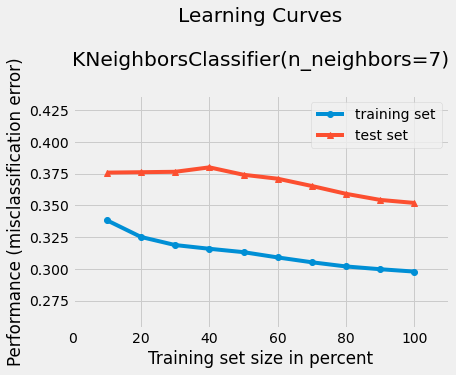

In [ ]:
plot_learning_curves(cv_train,training_labels, cv_test,testing_labels,knn_clf)
plt.show()